In [187]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [188]:
fp1 = r"C:\SEM6\PCPO\p8\img1.jpg"
fp2 = r"C:\SEM6\PCPO\p8\img2.jpg"
img1 = cv2.imread(fp1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(fp2, cv2.IMREAD_GRAYSCALE)

In [189]:
def ORB_match(filepath1, filepath2):
    # https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
    img1 = cv2.imread(filepath1,cv2.IMREAD_GRAYSCALE)  # queryImage
    img2 = cv2.imread(filepath2,cv2.IMREAD_GRAYSCALE)  # trainImage
    orb = cv2.ORB_create()  # Initiate ORB detector
    kp1, des1 = orb.detectAndCompute(img1, None)  # find the keypoints and descriptors with ORB
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)  # Match descriptors
    matches = sorted(matches, key=lambda x:x.distance)  # Sort descriptors in the order of their distance
    return kp1, kp2, des1, des2, matches

In [190]:
def SIFT_match(filepath1, filepath2):
    # https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
    img1 = cv2.imread(filepath1, cv2.IMREAD_GRAYSCALE)  # queryImage
    img2 = cv2.imread(filepath2, cv2.IMREAD_GRAYSCALE)  # trainImage
    sift = cv2.SIFT_create() # Initiate SIFT detector
    kp1, des1 = sift.detectAndCompute(img1, None) # find the keypoints and descriptors with SIFT
    kp2, des2 = sift.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_L2) # SIFT BFMatcher works best with norm L2 param

    ## moja wersja
    # matches = bf.match(des1, des2) # Match descriptors
    # print(matches)
    # matches = sorted(matches, key=lambda x: x.distance)
    # return kp1, kp2, des1, des2, matches

    ## wersja z docs
    matches = bf.knnMatch(des1, des2, k=2)
    good = []  # Apply ratio test
    for m, n in matches:
        if m.distance < 0.3 * n.distance:  # 0.75 * n.distance
            good.append([m])
    # matches = sorted(good, key=lambda x: x.distance)
    return kp1, kp2, des1, des2, good

In [191]:
def AKAZE_match(filepath1, filepath2):
    # https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
    img1 = cv2.imread(filepath1, cv2.IMREAD_GRAYSCALE)  # queryImage
    img2 = cv2.imread(filepath2, cv2.IMREAD_GRAYSCALE)  # trainImage
    akaze = cv2.AKAZE_create()  # Initiate AKAZE detector
    kp1, des1 = akaze.detectAndCompute(img1, None)
    kp2, des2 = akaze.detectAndCompute(img2, None)
    bf = cv2.BFMatcher()

    matches = bf.match(des1, des2) # Match descriptors
    matches = sorted(matches, key=lambda x:x.distance)  # Sort descriptors in the order of their distance
    return kp1, kp2, des1, des2, matches

# Brute-Force Matching with ORB Descriptors

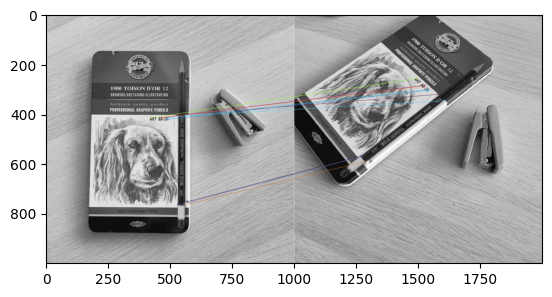

In [192]:
kp1, kp2, des1, des2, matches = ORB_match(fp1, fp2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  # Draw first 10 matches.
plt.imshow(img3)
plt.show()

# Brute-Force Matching with SIFT Descriptors and Ratio Test

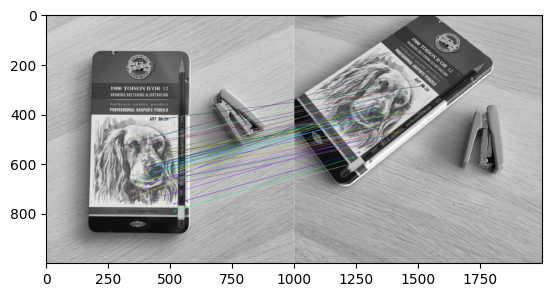

In [193]:
kp1, kp2, des1, des2, matches = SIFT_match(fp1, fp2)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)
plt.imshow(img3)
plt.show()

# Brute-Force Matching with AKAZE Descriptors

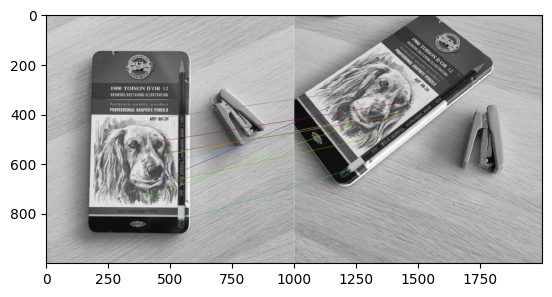

In [194]:
kp1, kp2, des1, des2, matches = AKAZE_match(fp1, fp2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  # Draw first 10 matches.
plt.imshow(img3)
plt.show()

# THE END

In [195]:
# # # Funkcje Jandersa i FLANN based Matcher
# # def sift():
# #     # sift
# #     zdjecie = cv2.imread('lena.png')
# #     szareZdjecie = cv2.cvtColor(zdjecie, cv2.COLOR_BGR2GRAY) # Konwersja obrazu do postaci zdjęcia w odcieniach szarości
# #     sift = cv2.SIFT_create(nfeatures = 0, nOctaveLayers = 3, contrastThreshold = 0.1, edgeThreshold = 10, sigma = 1.6)
# #     kp, descriptor = sift.detectAndCompute(szareZdjecie,None)
# #     print(descriptor)
# #     zdjecie =cv2.drawKeypoints(zdjecie , kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #     cv2.imwrite('sift_keypoints.jpg', zdjecie)

# #     # Zmiana parametrów detektor SIFT
# #     #sift = cv2.SIFT_create(nfeatures = 0, nOctaveLayers = 3, contrastThreshold = 0.04, edgeThreshold = 100, sigma = 1.6)
# #     #nfeatures - Liczba najlepszych cech do zachowania. Cechy są uszeregowane według ich punktacji (mierzonej w algorytmie SIFT jako lokalny kontrast)
# #     i = 0
# #     for k in kp:
# #         i+= 1

# #     print(i)

# #     cv2.imshow("Zdjecie z zaznaczonymi blobami", zdjecie)
# #     cv2.waitKey(0)


# # def akaze():
# #     print("akaze")
# #     zdjecie = cv2.imread('lena.png')
# #     szareZdjecie = cv2.cvtColor(zdjecie, cv2.COLOR_BGR2GRAY)
# #     akaze = cv2.AKAZE_create()
# #     kp, descriptor = akaze.detectAndCompute(szareZdjecie, None)
# #     print(descriptor)
# #     zdjecie = cv2.drawKeypoints(zdjecie, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #     cv2.imwrite('akaze_keypoints.jpg', zdjecie)

# #     cv2.imshow("Zdjecie z zaznaczonymi blobami", zdjecie)
# #     cv2.waitKey(0)

# # def brisk():
# #     print("brisk")
# #     zdjecie = cv2.imread('lena.png')
# #     szareZdjecie = cv2.cvtColor(zdjecie, cv2.COLOR_BGR2GRAY)
# #     brisk = cv2.BRISK_create()
# #     kp, descriptor = brisk.detectAndCompute(szareZdjecie, None)
# #     print(descriptor)
# #     zdjecie = cv2.drawKeypoints(zdjecie, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #     cv2.imwrite('brisk_keypoints.jpg', zdjecie)

# #     cv2.imshow("Zdjecie z zaznaczonymi blobami", zdjecie)
# #     cv2.waitKey(0)

# # def orb():
# #     print("orb")
# #     zdjecie = cv2.imread('lena.png')
# #     szareZdjecie = cv2.cvtColor(zdjecie, cv2.COLOR_BGR2GRAY)
# #     orb = cv2.ORB_create()
# #     kp, descriptor = orb.detectAndCompute(szareZdjecie, None)
# #     print(descriptor)
# #     zdjecie = cv2.drawKeypoints(zdjecie, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #     cv2.imwrite('orb_keypoints.jpg', zdjecie)

# #     cv2.imshow("Zdjecie z zaznaczonymi blobami", zdjecie)
# #     cv2.waitKey(0)

# # def kaze():
# #     print("kaze")
# #     zdjecie = cv2.imread('lena.png')
# #     szareZdjecie = cv2.cvtColor(zdjecie, cv2.COLOR_BGR2GRAY)
# #     kaze = cv2.KAZE_create()
# #     kp, descriptor = kaze.detectAndCompute(szareZdjecie, None)
# #     print(descriptor)
# #     zdjecie = cv2.drawKeypoints(zdjecie, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #     cv2.imwrite('kaze_keypoints.jpg', zdjecie)

# #     cv2.imshow("Zdjecie z zaznaczonymi blobami", zdjecie)
# #     cv2.waitKey(0)



# def brute_force_orb():
#     # brute force
#     # Initiate ORB detector
#     orb = cv2.ORB_create()
#     # find the keypoints and descriptors with ORB
#     kp1, des1 = orb.detectAndCompute(img1,None)
#     kp2, des2 = orb.detectAndCompute(img2,None)
#     # create BFMatcher object
#     bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
#     # Match descriptors.
#     matches = bf.match(des1,des2)
#     # Sort them in the order of their distance.
#     matches = sorted(matches, key = lambda x:x.distance)
#     # Draw first 10 matches.
#     img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     plt.imshow(img3),plt.show()

# def brute_force_sift():
#     # Initiate SIFT detector
#     sift = cv2.SIFT_create()
#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = sift.detectAndCompute(img1, None)
#     kp2, des2 = sift.detectAndCompute(img2, None)
#     # BFMatcher with default params
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(des1, des2, k=2)
#     # Apply ratio test
#     good = []
#     for m, n in matches:
#         if m.distance < 0.75 * n.distance:
#             good.append([m])
#     # cv.drawMatchesKnn expects list of lists as matches.
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     plt.imshow(img3), plt.show()

# def flann():
#     # Initiate SIFT detector
#     sift = cv2.SIFT_create()
#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = sift.detectAndCompute(img1, None)
#     kp2, des2 = sift.detectAndCompute(img2, None)
#     # FLANN parameters
#     FLANN_INDEX_KDTREE = 1
#     index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
#     search_params = dict(checks=50)  # or pass empty dictionary
#     flann = cv2.FlannBasedMatcher(index_params, search_params)
#     matches = flann.knnMatch(des1, des2, k=2)
#     # Need to draw only good matches, so create a mask
#     matchesMask = [[0, 0] for i in range(len(matches))]
#     # ratio test as per Lowe's paper
#     for i, (m, n) in enumerate(matches):
#         if m.distance < 0.7 * n.distance:
#             matchesMask[i] = [1, 0]
#     draw_params = dict(matchColor=(0, 255, 0),
#                        singlePointColor=(255, 0, 0),
#                        matchesMask=matchesMask,
#                        flags=cv2.DrawMatchesFlags_DEFAULT)
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
#     plt.imshow(img3, ), plt.show()


# def brute_force_akaze():
#     # Initiate AKAZE detector
#     akaze = cv2.AKAZE_create()
#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = akaze.detectAndCompute(img1, None)
#     kp2, des2 = akaze.detectAndCompute(img2, None)
#     # BFMatcher with default params
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(des1, des2, k=2)
#     # Apply ratio test
#     good = []
#     for m, n in matches:
#         if m.distance < 0.75 * n.distance:
#             good.append([m])
#     # cv.drawMatchesKnn expects list of lists as matches.
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     plt.imshow(img3), plt.show()

# def brute_force_kaze():
#     # Initiate AKAZE detector
#     kaze = cv2.KAZE_create()
#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = kaze.detectAndCompute(img1, None)
#     kp2, des2 = kaze.detectAndCompute(img2, None)
#     # BFMatcher with default params
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(des1, des2, k=2)
#     # Apply ratio test
#     good = []
#     for m, n in matches:
#         if m.distance < 0.75 * n.distance:
#             good.append([m])
#     # cv.drawMatchesKnn expects list of lists as matches.
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     plt.imshow(img3), plt.show()

# def brute_force_brisk():
#     # Initiate AKAZE detector
#     brisk = cv2.BRISK_create()
#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = brisk.detectAndCompute(img1, None)
#     kp2, des2 = brisk.detectAndCompute(img2, None)
#     # BFMatcher with default params
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(des1, des2, k=2)
#     # Apply ratio test
#     good = []
#     for m, n in matches:
#         if m.distance < 0.75 * n.distance:
#             good.append([m])
#     # cv.drawMatchesKnn expects list of lists as matches.
#     img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#     plt.imshow(img3), plt.show()